# Notes

## Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

## Loading Data

### CSV file with pandas

In [2]:
data = pd.read_csv("real_estate_price_size_year.csv")

### Get a preview

In [3]:
data.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


### General data

In [4]:
data.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


## OLS Regression

In [5]:
y = data["price"]
x1 = data[["size", "year"]]

x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Thu, 21 May 2020   Prob (F-statistic):           2.77e-32
Time:                        12:11:28   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
size         227.7009     12.474     18.254      0.000     202.943     252.458
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Dummy Variable Mapping

In [6]:
# data = pd.read_csv("file.csv")
# data["category"] = data["category"].map({"yes": 1, "no": 0})

## Making Predictions based on Regressions

In [7]:
#predictions =  results.predict(data)

## Same Regression Using SKLearn

In [8]:
#x_matrix = x.values.reshape(len, 1)
#reg = LinearRegression()
#reg.fit(x, y)

### R-Squared

In [9]:
#reg.score(x_matrix, y)

#Adjusted R Square
# r2 = re.score(x, y)
# n = x.shape[0]
# p = x.shape[1]
# adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)

### Coefficients

In [10]:
#reg.coef_

### Intercepts

In [11]:
#reg.intercept_

### Making Predictions

In [12]:
#reg.predict(1740)

#new_data = pd.DataFrame(data=[1740, 1760], columns=["SAT"])
#reg.predict(new_data)

## Feature Selection 

In [13]:
# from sklearn.feature_selection import f_regression
# f_regression(x, y)
# p_values = f_regression(x, y)[1]
# p_values.round(3)

## Standardizing Data


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
#scaler.fit(x)
#x_scaled = scaler.transform(x)

### Predicting with standardized data

In [17]:
#new_data_scaled = scaler.transform(new_data)
#reg.predict(new_data_scaled)

## Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
a = np.arange(1, 101)
b = np.arange(1, 600)
a_train, a_test = train_test_split(a, test_size=0.2, shuffle=False, random_state=42)

In [19]:
a_train

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])

In [20]:
a_test

array([ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100])

## Plotting with Seaborn

In [21]:
#seaborn.distplot(data_no_mv["category"])

## Dealing with outliers

In [22]:
#remove with percentile
#q = data["category"].quantile(0.99)
#data_1 = data[data["category"] < q]

#re-indexing
#data_cleaned = data.reset_index(drop=True)

## Log Transformation

In [23]:
#data_log = np.log(data["category"])

## Calculating Multicolinearity

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
#variables = data[["mileage", "year", "EnginV"]]
#vif = pd.DataFrame()
#vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
#vif["features"] = variables.columns

## Create dummy variables for categorical data automatically

If there are n dummies, there are n-1 dummy variables

In [26]:
#data_with_dummies = pd.get_dummies(data, drop_first=True)

## Logistic Regression

In [27]:
# x = sm.add_constant(x1)
# reg_log = sm.Logit(y, x)
# results_log = reg_log.fit()

## Logistic Accuracy

In [28]:
# results_log.pred_table()

## Cluster Analysis

## K-means clustering

In [29]:
#slice the data we want with pandas
# x = data.iloc[:, 1:3]

### dependiecies

In [30]:
from sklearn.cluster import KMeans

In [31]:
#kmeans = KMeans(2)
#kemans.fit(x)

### Clustering results

In [32]:
# indentified_clusters = kmeans.fit_predict(x)

## Selecting the number of cluster

### WCSS

In [33]:
#kmeans.inertia_

#wcss = []
# for i in range(1, 7):
#     kmeans = KMeans(i)
#     kmeans.fit(x)
#     wcss.append(kmeans.inertia_)

### The Elbow Method

In [34]:
# number_clusters = range(1, 7)
# plt.plot(number_clusters, wcss)

## Standardize each column with respect to itself

In [35]:
from sklearn import preprocessing
#x_scaled = preprocessing.scale(x)

## Transposing a Matrix

In [36]:
import numpy as np
a = np.array([[1, 2, 3, 4]])
a.T

array([[1],
       [2],
       [3],
       [4]])

## Dot Product

In [37]:
#np.dot(x,y) --> x and y are matrices of the same shape

# Simple Linear Regression. Minimal example

## Import libraries

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Generate random input data to train on

In [39]:
#Fake data with a linear relationship
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(low=-10, high=10, size=(observations, 1))

inputs = np.column_stack((xs, zs))
inputs.shape

(1000, 2)

## Create the targets we will aim at

In [40]:
noise = np.random.uniform(-1, 1, (observations, 1))

targets = 2*xs - 3*zs + 5 + noise

targets.shape

(1000, 1)

## Plot the training data

the point is to see that there is a strong trend that our model should learn to produce.

## Initialize Variables

In [41]:
init_range = 0.1
weights = np.random.uniform(-init_range, init_range, (2, 1))
biases = np.random.uniform(-init_range, init_range, 1)

weights

array([[-0.08250302],
       [ 0.00352381]])

## Set a learning rate

In [42]:
learning_rate = 0.02

## Train the model

In [43]:
#plan:
# 1. Calculate the Outputs
# 2. Compare the outputs to targets through the loss
# 3. Print the loss
# 4. Adjust weights and biases

for i in range(100):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets
    loss = np.sum(deltas ** 2) / 2/ observations
    print(loss)
    
    deltas_scaled = deltas / observations
    weights = weights - np.dot(inputs.T, deltas_scaled) * learning_rate
    biases = biases - learning_rate * np.sum(deltas_scaled)

243.80405020426903
34.69096345025706
13.502330668973972
10.988337580187457
10.359898179702522
9.936501252843136
9.54814315392454
9.177012857498706
8.820753533277857
8.47860531691198
8.149992406974421
7.834377609299557
7.5312466103730475
7.240105608520103
6.9604803512993785
6.69191534658811
6.433973118914172
6.186233496659568
5.94829292760898
5.71976382158677
5.50027391909685
5.289465684935408
5.08699572578862
4.892534230866627
4.705764434662525
4.526382100961379
4.354095027258596
4.1886225687804925
4.029695181331664
3.8770539822244836
3.7304503285755555
3.5896454122821213
3.4544098710187527
3.3245234146205767
3.1997744662444894
3.079959817723847
2.964884298555169
2.8543604579776978
2.748208259627948
2.646254788271816
2.5483339681365824
2.45428629238395
2.3639585632834725
2.2772036426631046
2.1938802122304173
2.11385254337401
2.036990276070163
1.9631682065345797
1.892266083273332
1.824168411200757
1.7587642635052434
1.6959471009564606
1.6356145983596766
1.577668477874462
1.5220143489262

In [44]:
#Target was 2*xs-3*zs + 5 + noise
print(weights, biases)

[[ 2.00786049]
 [-3.00555141]] [4.34211395]


# TensorFlow

In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Data Generation

In [46]:
observations = 1000

xs = np.random.uniform(-10, 10, (observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (observations, 1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


## Solving with Tensorflow

In [47]:
training_data = np.load("TF_intro.npz")
input_size = 2
output_size = 1
#laying down the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size, #takes inputs dot products the inputs and the weights and adds the bias
    kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
    )
])
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
#sgd: Stochastic Gradient Descent optimizer
model.compile(optimizer=custom_optimizer, loss="mean_squared_error")
#epoch: iteration over the full dataset
#verbos = 0: silent, no ouput about the training displayed
model.fit(training_data["inputs"], training_data["targets"], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 28.4644
Epoch 2/100
32/32 - 0s - loss: 1.2348
Epoch 3/100
32/32 - 0s - loss: 0.4710
Epoch 4/100
32/32 - 0s - loss: 0.3939
Epoch 5/100
32/32 - 0s - loss: 0.4292
Epoch 6/100
32/32 - 0s - loss: 0.3785
Epoch 7/100
32/32 - 0s - loss: 0.3878
Epoch 8/100
32/32 - 0s - loss: 0.3494
Epoch 9/100
32/32 - 0s - loss: 0.3958
Epoch 10/100
32/32 - 0s - loss: 0.3824
Epoch 11/100
32/32 - 0s - loss: 0.3977
Epoch 12/100
32/32 - 0s - loss: 0.3924
Epoch 13/100
32/32 - 0s - loss: 0.4354
Epoch 14/100
32/32 - 0s - loss: 0.3577
Epoch 15/100
32/32 - 0s - loss: 0.3744
Epoch 16/100
32/32 - 0s - loss: 0.4119
Epoch 17/100
32/32 - 0s - loss: 0.4251
Epoch 18/100
32/32 - 0s - loss: 0.4022
Epoch 19/100
32/32 - 0s - loss: 0.3729
Epoch 20/100
32/32 - 0s - loss: 0.3932
Epoch 21/100
32/32 - 0s - loss: 0.4391
Epoch 22/100
32/32 - 0s - loss: 0.3911
Epoch 23/100
32/32 - 0s - loss: 0.4304
Epoch 24/100
32/32 - 0s - loss: 0.3766
Epoch 25/100
32/32 - 0s - loss: 0.3857
Epoch 26/100
32/32 - 0s - loss: 0

## Check the weights and Biases

In [48]:
model.layers[0].get_weights()

[array([[ 1.9071968],
        [-2.9327314]], dtype=float32),
 array([4.9860516], dtype=float32)]

## Make Predictions

In [49]:
model.predict_on_batch(training_data["inputs"]).round(1)

array([[ 20.2],
       [  9.3],
       [  8.6],
       [ -0.7],
       [ 10.6],
       [ 38.8],
       [  4. ],
       [  8.7],
       [  2.2],
       [  8.3],
       [ -0.2],
       [ 10.7],
       [ -8.2],
       [  7.7],
       [-19.9],
       [ 27.4],
       [ 17. ],
       [-31.6],
       [ 33. ],
       [  2.3],
       [ 31.6],
       [ 23.2],
       [ 25.7],
       [  4.8],
       [-23. ],
       [ 14.7],
       [ 36.6],
       [ 27.6],
       [  7.3],
       [ 15.3],
       [ -6.5],
       [  1.4],
       [ 19.9],
       [  4. ],
       [ 18.8],
       [  3.4],
       [ 30.4],
       [ 38.1],
       [  3.9],
       [ 26.3],
       [ 21.7],
       [  5.5],
       [-27.2],
       [-22.9],
       [ 11.3],
       [-30.3],
       [-12.7],
       [-10.2],
       [  2.2],
       [ -9. ],
       [  5.6],
       [ 31. ],
       [-17.5],
       [-18.9],
       [ -9.9],
       [-13.4],
       [ 33. ],
       [ 15.1],
       [ 40.3],
       [-12.2],
       [ -2.7],
       [ 13.3],
       [

In [50]:
training_data["targets"].round(1)

array([[ 20.7],
       [  8.7],
       [  8.5],
       [ -0.9],
       [  9.8],
       [ 39.5],
       [  4.2],
       [  8.8],
       [  0.9],
       [  7.8],
       [ -0. ],
       [ 11.3],
       [ -7.8],
       [  7.9],
       [-21.1],
       [ 27.8],
       [ 16.2],
       [-33.7],
       [ 33.9],
       [  2.4],
       [ 33.1],
       [ 23.8],
       [ 27.6],
       [  4.4],
       [-24.9],
       [ 13.6],
       [ 38.1],
       [ 27.5],
       [  7. ],
       [ 16. ],
       [ -7.5],
       [  1.6],
       [ 20.3],
       [  3.5],
       [ 19.1],
       [  4.4],
       [ 30.9],
       [ 38.7],
       [  4. ],
       [ 27.5],
       [ 22.7],
       [  6. ],
       [-28.3],
       [-23.9],
       [ 10.8],
       [-30.6],
       [-12.4],
       [-11.4],
       [  2.5],
       [ -9.3],
       [  5. ],
       [ 30.7],
       [-18.7],
       [-19.3],
       [-10.7],
       [-15. ],
       [ 33.5],
       [ 14.3],
       [ 41.6],
       [-11.6],
       [ -3.1],
       [ 13.3],
       [

## Plotting the data

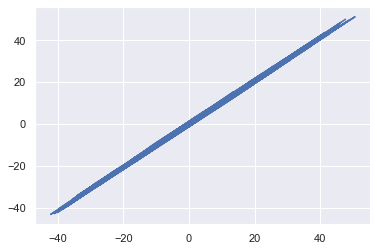

In [51]:
plt.plot(model.predict_on_batch(training_data["inputs"]).round(1), training_data["targets"].round(1))

# MNIST

In [52]:
import tensorflow_datasets as tfds

In [53]:
mnist_dataset, mnist_info = tfds.load("mnist", with_info=True, as_supervised=True)

In [54]:
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset["test"]

#create or own validation dataset
num_validation_samples = 0.1 * mnist_info.splits["train"].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)
#create a variable for the number of samples
num_test_samples = mnist_info.splits["test"].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

#create a function that scales the data from 0-1
def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.
    return image, label

scaled_train_and_validation_data = mnist_train.map(scale)

#randomize the dataset
BUFFER_SIZE = 10000

scaled_train_and_validation_data  = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = scaled_train_and_validation_data.take(num_validation_samples)
train_data = scaled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE = 1000
# 1 is stochastic

train_data = train_data.batch(BATCH_SIZE)
#for validation, we want all da ting
validation_data = validation_data.batch(num_validation_samples)

validation_inputs, validation_targets = next(iter(validation_data))

## Model

### Outline the model

In [55]:
input_size = 784
output_size = 10
hidden_layer_size = 500

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(hidden_layer_size, activation="relu"),
    tf.keras.layers.Dense(hidden_layer_size, activation="relu"),
    tf.keras.layers.Dense(output_size, activation="softmax")
])

## Choose the optimizer and the loss function

In [56]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

## Training

In [57]:
NUM_EPOCHS = 5

model.fit(train_data, epochs=NUM_EPOCHS, validation_data=(validation_inputs, validation_targets), verbose=2)

Epoch 1/5
54/54 - 13s - loss: 0.3295 - accuracy: 0.8974 - val_loss: 0.1181 - val_accuracy: 0.9650
Epoch 2/5
54/54 - 12s - loss: 0.0920 - accuracy: 0.9728 - val_loss: 0.0687 - val_accuracy: 0.9775
Epoch 3/5
54/54 - 12s - loss: 0.0541 - accuracy: 0.9834 - val_loss: 0.0501 - val_accuracy: 0.9832
Epoch 4/5
54/54 - 12s - loss: 0.0381 - accuracy: 0.9882 - val_loss: 0.0310 - val_accuracy: 0.9885
Epoch 5/5
54/54 - 12s - loss: 0.0250 - accuracy: 0.9927 - val_loss: 0.0266 - val_accuracy: 0.9925


## Test the model

In [60]:
test_loss, test_accuracy = model.evaluate(mnist_test)
print("test loss:{0:.2f}. Test Accuracy: {1:.2f}".format(test_loss, test_accuracy*100.))

ValueError: in user code:

    C:\Users\bryan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:941 test_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\bryan\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\bryan\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\bryan\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\bryan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:909 test_step  **
        y_pred = self(x, training=False)
    C:\Users\bryan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    C:\Users\bryan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:277 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\bryan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\network.py:719 call
        convert_kwargs_to_constants=base_layer_utils.call_context().saving)
    C:\Users\bryan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\network.py:888 _run_internal_graph
        output_tensors = layer(computed_tensors, **kwargs)
    C:\Users\bryan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:886 __call__
        self.name)
    C:\Users\bryan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer dense_1 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape [28, 28]
